<a href="https://colab.research.google.com/github/Ayush-2026/ML-Lab-evaluation/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv('houseprice 1.csv')

In [ ]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
data.shape


(1000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
columns_to_drop = ['Lot_Size', 'Neighborhood_Quality']  # Replace with the actual column names
data = data.drop(columns=columns_to_drop, errors='ignore')
data.head() # To verify

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
0,1360,2,1,1981,0,2.623829e+05
1,4272,3,3,2016,1,9.852609e+05
2,3592,1,2,2016,0,7.779774e+05
3,966,1,2,1977,1,2.296989e+05
4,4926,2,1,1993,0,1.041741e+06


In [ ]:
data.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Garage_Size,0
House_Price,0


In [ ]:

    data.fillna(data.mean(), inplace=True)

In [ ]:

pd.isnull(data).sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Garage_Size,0
House_Price,0


In [ ]:
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,1.022000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,0.814973,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,0.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,1.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,2.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,2.000000,1.108237e+06


In [ ]:
X = data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Garage_Size']]
y = data['House_Price']

In [ ]:

X.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Garage_Size
0,1360,2,1,1981,0
1,4272,3,3,2016,1
2,3592,1,2,2016,0
3,966,1,2,1977,1
4,4926,2,1,1993,0


In [ ]:

y.head()

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**function** **to** **evaluate** **and** **print** **model** **performance**

In [ ]:
results = {}

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    return mae  # Choose MAE as the metric to compare models


**linear** **reggresion**


In [ ]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
evaluate_model(linear_model, X_test, y_test)


Mean Absolute Error: 18770.195610532835
Mean Squared Error: 505696350.53368896
Root Mean Squared Error: 22487.693312869797


18770.195610532835

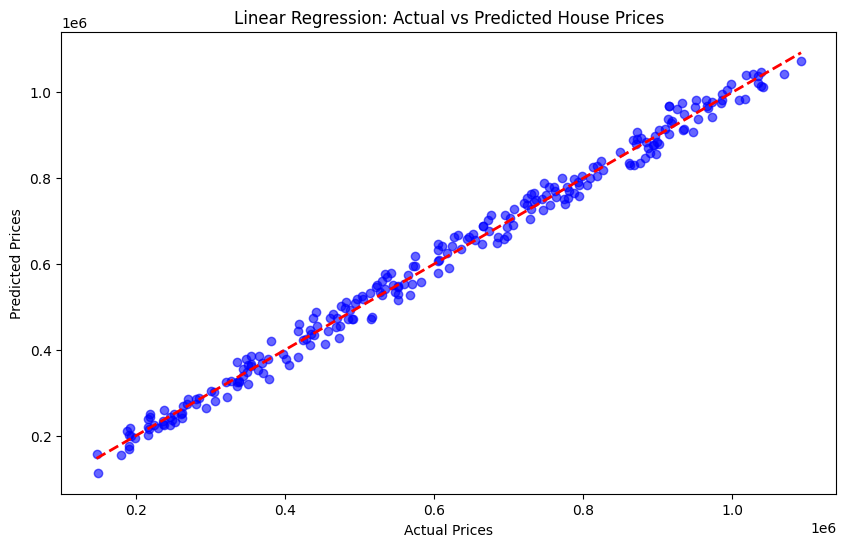

In [ ]:
y_pred = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.show()

**Random Forest Regressor**

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Mean Absolute Error: 21816.107480416016
Mean Squared Error: 730610583.000191
Root Mean Squared Error: 27029.809155822593


21816.107480416016

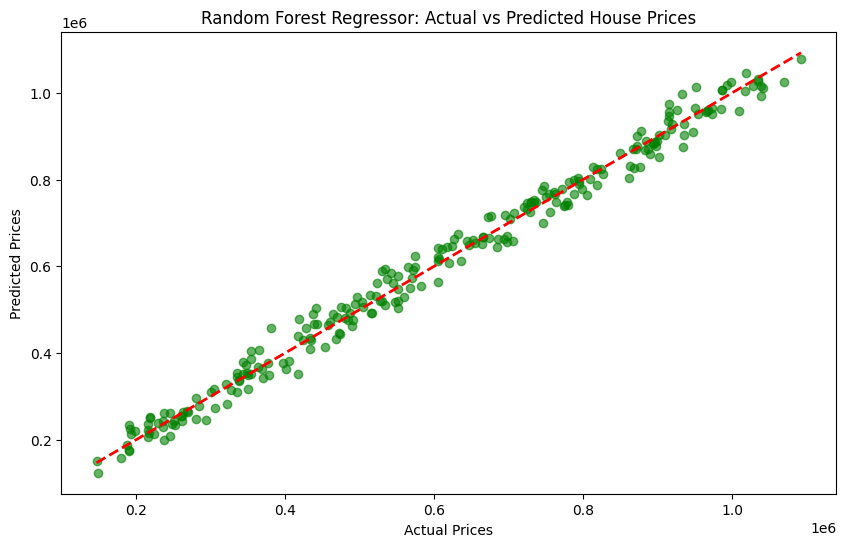

In [ ]:

y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor: Actual vs Predicted House Prices')
plt.show()


**Gradient Boosting Regressor**

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
evaluate_model(gb_model, X_test, y_test)

Mean Absolute Error: 21913.739145828957
Mean Squared Error: 664496166.4673315
Root Mean Squared Error: 25777.82315222392


21913.739145828957

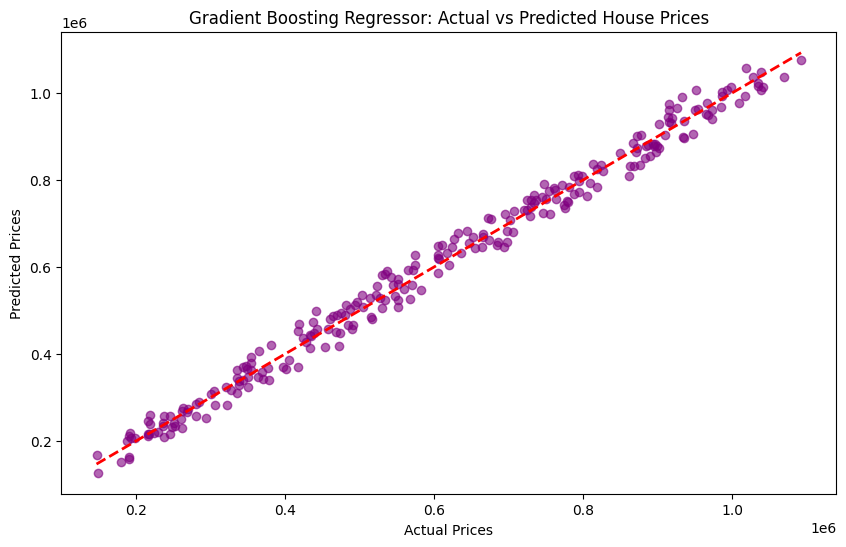

In [ ]:
y_pred_gb = gb_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Regressor: Actual vs Predicted House Prices')
plt.show()


**comparing and fing best** **model**
---



In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [ ]:
best_model = None
best_mae = float("inf")
best_model_name = None

In [ ]:
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}:")
    model.fit(X_train, y_train)
    mae = evaluate_model(model, X_test, y_test)

    # Update best model if the current model performs better
    if mae < best_mae:
        best_mae = mae
        best_model = model
        best_model_name = model_name

# Output the best model
print("\nBest Model:")
print(f"{best_model_name} with Mean Absolute Error: {best_mae}")


Training and evaluating Linear Regression:
Mean Absolute Error: 18770.195610532835
Mean Squared Error: 505696350.53368896
Root Mean Squared Error: 22487.693312869797

Training and evaluating Random Forest Regressor:
Mean Absolute Error: 21816.107480416016
Mean Squared Error: 730610583.000191
Root Mean Squared Error: 27029.809155822593

Training and evaluating Gradient Boosting Regressor:
Mean Absolute Error: 21913.739145828957
Mean Squared Error: 664496166.4673315
Root Mean Squared Error: 25777.82315222392

Best Model:
Linear Regression with Mean Absolute Error: 18770.195610532835
